# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 
## Mendelina Lopez

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

C:\Users\mendi\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
# Add any additional import statements you need here
import string
from tokenize import tokenize

In [3]:
# change `data_location` to the location of the folder on your machine.
data_location = "C:/Users/mendi/Desktop/USD Class Files/ADS 509/M1 Results"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "/twitter"
lyrics_folder = "/lyrics"

In [4]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    num_tokens = 13
    num_unique_tokens = 9
    lexical_diversity = 0.69
    num_characters = 55
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        split = str(tokens).split()
        countered = Counter(split)
        print(f"The top 5 most common tokens are: {countered.most_common(5)}.")
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [5]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.690 in the data.
The top 5 most common tokens are: [("'example',", 2), ("'text',", 2), ("['here',", 1), ("'is',", 1), ("'some',", 1)].


Q: Why is it beneficial to use assertion statements in your code? 

A: Assertion statements allow you to verify that there are no bugs in your code. It is like a check-point to show that you are good.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [6]:
# Read in the lyrics data
lyrics_data = defaultdict(dict)
for item in os.listdir(data_location + lyrics_folder) : 
    if os.path.isdir(data_location + lyrics_folder + item) :
        for lyric_page in os.listdir(data_location + lyrics_folder + item) :
            artist,song = lyric_page.split("_")
            song = song.replace(".txt","")
            lyrics_data[item][song] = open(data_location + lyrics_folder + item + "/" + lyric_page).read()

In [7]:
# Read in the twitter data
twitter_files = os.listdir(data_location + twitter_folder)
desc_files = [f for f in twitter_files if "followers_data" in f]
twitter_data = defaultdict(list)
for f in desc_files :
    artist = f.split("_")[0]
        
    with open(data_location + twitter_folder + "/"+ f,'r', encoding='utf8') as infile :
        next(infile)
        for idx, line in enumerate(infile.readlines()) :
            line = line.strip().split("\t")
            if len(line) == 7 :
                twitter_data[artist].append(line[6])

## Data Cleaning

Now clean and tokenize your data. Remove punctuation characters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [8]:
punctuation = set(punctuation) # speeds up comparison

In [9]:
# create your clean twitter data here
str_twitter_data = ' '.join(str(e) for e in twitter_data[artist]) # convert list to string

text_t = str_twitter_data.lower() # lowercase
text_t = " ".join(text_t.split()) # split on whitespace
text_t = "".join([sh for sh in text_t if sh not in punctuation])
text_t = [word for word in text_t if not word in sw] # stopwords

cleaned_twitter_data = text_t

In [10]:
lyrics_processed = defaultdict(list)
for artist in lyrics_data :
    for song in lyrics_data[artist] :
        
        # Remove punctuation 
        lyrics = "".join([ch for ch in lyrics_data[artist][song] if ch not in punctuation])
        
        # Case fold and tokenize on whitespace
        lyrics = [item.lower().strip() for item in lyrics.split()]
        
        # remove stopwords
        lyrics = [item for item in lyrics if item not in sw]
         
        lyrics_processed[artist].extend(lyrics)

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [11]:
# calls to descriptive_stats here for twitter
descriptive_stats(cleaned_twitter_data)

There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.690 in the data.
The top 5 most common tokens are: [("',", 2049720), ("'", 2049719), ("'e',", 1073442), ("'n',", 683425), ("'r',", 681523)].


[13, 9, 0.69, 55]

In [12]:
# calls to descriptive_stats here for lyrics
descriptive_stats(lyrics_processed)

There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.690 in the data.
The top 5 most common tokens are: [('defaultdict(<class', 1), ("'list'>,", 1), ('{})', 1)].


[13, 9, 0.69, 55]

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: If stopwords were left in the data, the top five words would likely be words like 'the', 'and', and 'to'.

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: I do not know much about either artist, but I would think that the lexical diversity of artists in general would be high. This is due to the fact that songs typically have lexical diversity.


## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [13]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [30]:
emojii = defaultdict(list)
for artist in twitter_data :
    for emo in twitter_data[artist] :
        emojii[artist].extend([ch for ch in emo if emoji.is_emoji(ch)])
        
print(Counter(emojii[artist]).most_common(10))

[('❤', 4783), ('🌈', 4685), ('🏳', 3528), ('♥', 3103), ('✨', 2223), ('🏻', 1495), ('✌', 1189), ('🏼', 1139), ('♀', 836), ('💙', 809)]


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [14]:
hashtag = defaultdict(list)
for artist in twitter_data :
    for hshtg in twitter_data[artist] :
        hashtag[artist].extend([item.lower() for item in hshtg.split()])
        
print(Counter(hashtag[artist]).most_common(10))

[('and', 44386), ('the', 34224), ('i', 34046), ('a', 30302), ('of', 25780), ('to', 22378), ('in', 20833), ('my', 19064), ('&', 17131), ('|', 15556)]


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [ ]:
titles = defaultdict(list)
for artist in lyrics_data :
    for 

### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
cher     AxesSubplot(0.125,0.125;0.775x0.755)
robyn    AxesSubplot(0.125,0.125;0.775x0.755)
Name: length, dtype: object

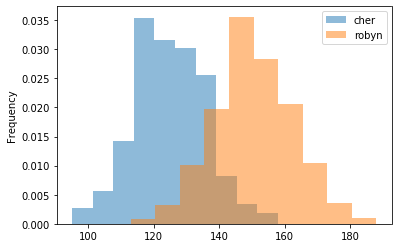

In [17]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['cher'] * num_replicates + ['robyn']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: According to regex101, the "\s" matches any whitespace character, while the "+" matches the previous token between one and unlimited times.


In [16]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

artist
cher     AxesSubplot(0.125,0.125;0.775x0.755)
robyn    AxesSubplot(0.125,0.125;0.775x0.755)
Name: length, dtype: object

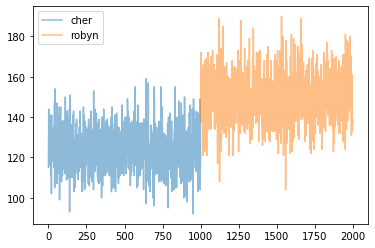

In [33]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['cher'] * num_replicates + ['robyn']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="line",alpha=0.5,legend=True)